## Bootstrap Aggregating (Bagging) for classification with Python

In [2]:
# Library for reading in data and using dataframes
import pandas as pd
# Using numpy arrays
import numpy as np
# Data preprocessing functions like LabelEncoder
from sklearn import preprocessing
%matplotlib inline
# Visualizations
import matplotlib.pyplot as plt
# Model accuracy
from sklearn import metrics
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Give loops a progress bar
from tqdm import tqdm

In [3]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [4]:
# Plot tree helper libraries
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree


def plot_tree(model,filename = "tree.png"):
    #global churn_df 

    dot_data = StringIO()
  

    featureNames = [colunm  for colunm in churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].columns]
    out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= ['left','stay'], filled=True,  special_characters=True,rotate=False)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')

In [ ]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    #Iterate through different number of estimators and average out the results  


    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))
     #average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            #Iterate through different number of estimators and average out the results   
        
            Bag= BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
          
            
             
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
           
            
            
  
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
        
        
        
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()

In [6]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data pre-processing and selection

In [7]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [9]:
churn_df.shape

(200, 10)

In [10]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

## Bootstrap Sampling

In [11]:
from sklearn.utils import resample

In [12]:
churn_df[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [13]:
resample(churn_df[0:5])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0


In [14]:
resample(churn_df[0:5])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Train/Test Dataset

In [16]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
X.head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [17]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)   
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [21]:
max_depth=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree
Tree.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
yhat = Tree.predict(X_test)
yhat

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [23]:
get_accuracy(X_train, X_test, y_train, y_test, Tree)

{'test Accuracy': 0.6166666666666667, 'train Accuracy': 0.9071428571428571}

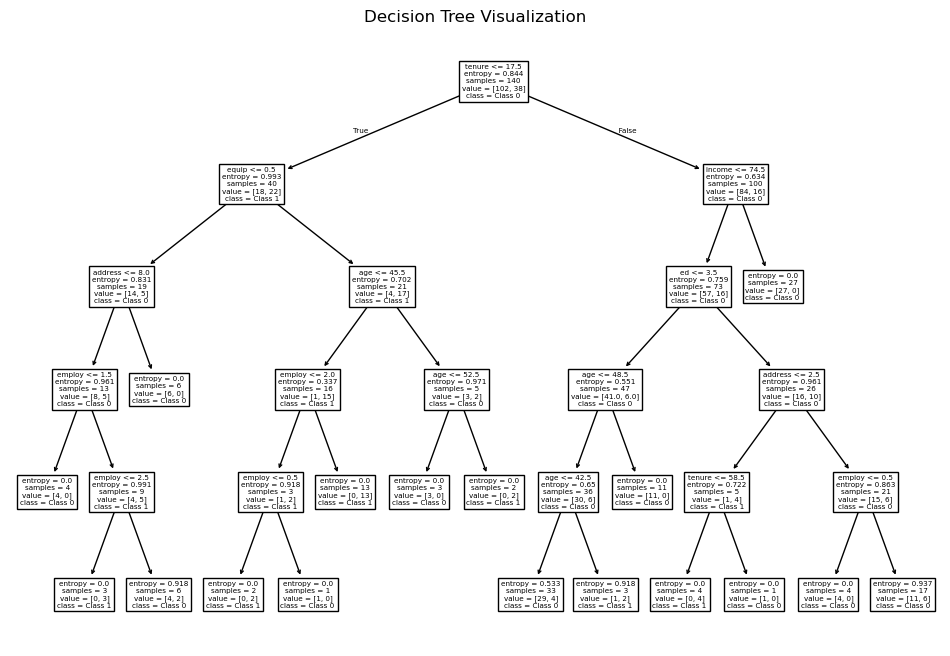

In [24]:
# Adjust the tree plot without 'filled' argument if necessary
plt.figure(figsize=(12, 8))
plot_tree(Tree, 
          feature_names=X.columns,  # Make sure this is a DataFrame; replace with list if it's not
          class_names=['Class 0', 'Class 1'])  # Replace with actual class names

plt.title('Decision Tree Visualization')
plt.savefig("tree.png")
plt.show()

{'test Accuracy': 0.65, 'train Accuracy': 0.9357142857142857}


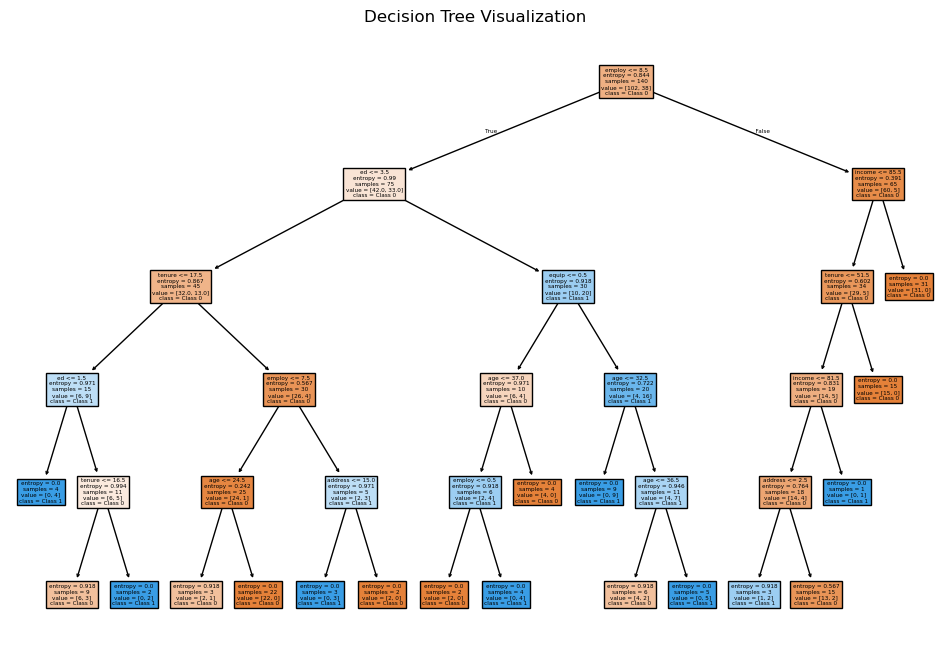

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=5)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=8)
Tree.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  Tree))
plt.figure(figsize=(12, 8))  # Set figure size
plot_tree(Tree, 
          filled=True, 
          feature_names=X.columns,  # Replace with actual feature names if X is not a DataFrame
          class_names=['Class 0', 'Class 1'])  # Replace with actual class names

# Save the tree as an image
plt.title('Decision Tree Visualization')
plt.savefig("tree1.png")
plt.show()

## Bagging for classification 

In [26]:
from sklearn.ensemble import BaggingClassifier

In [27]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2),n_estimators=30,random_state=0,bootstrap=True)

In [30]:
Bag.fit(X_train, y_train)

,estimator,DecisionTreeC...andom_state=2)
,n_estimators,30
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,0
,verbose,0


In [31]:
Bag.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [32]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.7, 'train Accuracy': 0.9071428571428571}


100%|██████████| 20/20 [02:45<00:00,  8.29s/it]


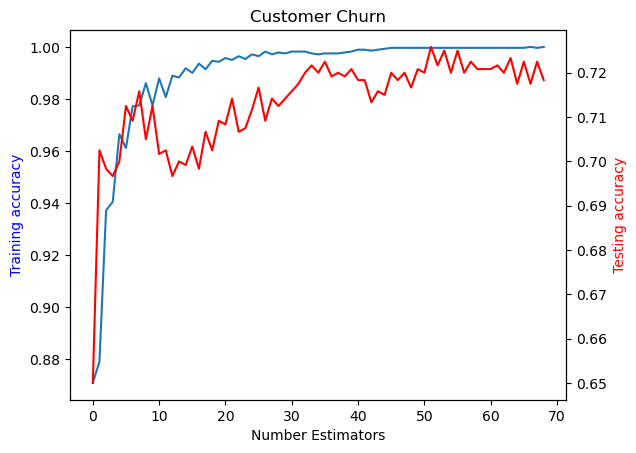

In [33]:
get_accuracy_bag(X, y, "Customer Churn")

## Low Variance Example
Bagging does not improve result if the model has low Variance i.e. does reasonably well on the test and training data. Consider the SVM; the accuracy on the tests data and training data are similar

In [34]:
from sklearn.svm import SVC

clf=SVC(kernel='linear',gamma='scale')
clf.fit(X_train, y_train) 
print(get_accuracy(X_train, X_test, y_train, y_test,  clf))

{'test Accuracy': 0.7166666666666667, 'train Accuracy': 0.7642857142857142}


In [35]:
Bag = BaggingClassifier(estimator=SVC(kernel='linear',gamma='scale'),n_estimators=10,random_state=0,bootstrap=True)
Bag.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.7, 'train Accuracy': 0.7785714285714286}


## Practice with Cancer data

In [36]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
df = df[df["BareNuc"] != '?']

In [38]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [39]:
y = df['Class']

y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'estimator__max_depth' : [2*n+1 for n in range(10) ] }

In [43]:
Bag = BaggingClassifier(estimator = DecisionTreeClassifier(), random_state=0, bootstrap=True)

In [44]:
search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)

In [45]:
search.fit(X_train, y_train)

,estimator,BaggingClassi...andom_state=0)
,param_grid,"{'estimator__max_depth': [1, 3, ...], 'n_estimators': [1, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [46]:
search.best_score_

0.9688644688644689

In [47]:
search.best_params_

{'estimator__max_depth': 5, 'n_estimators': 11}

In [48]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 0.9853479853479854}


100%|██████████| 20/20 [01:52<00:00,  5.60s/it]


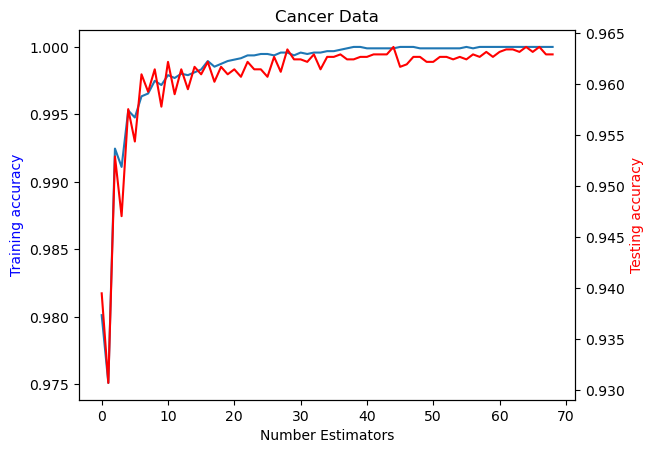

In [49]:
get_accuracy_bag(X, y, "Cancer Data")

## During the course of treatment
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

In [50]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [51]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [52]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [53]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

In [54]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [55]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [56]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [57]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'estimator__max_depth' : [2*n+1 for n in range(10) ]}

In [58]:
Bag = BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,bootstrap=True)

In [59]:
search = GridSearchCV(estimator=Bag, param_grid=param_grid,scoring='accuracy', cv=3)

In [60]:
search.fit(X_train, y_train)

,estimator,BaggingClassi...andom_state=0)
,param_grid,"{'estimator__max_depth': [1, 3, ...], 'n_estimators': [1, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [61]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 0.9853479853479854}


100%|██████████| 20/20 [01:25<00:00,  4.29s/it]


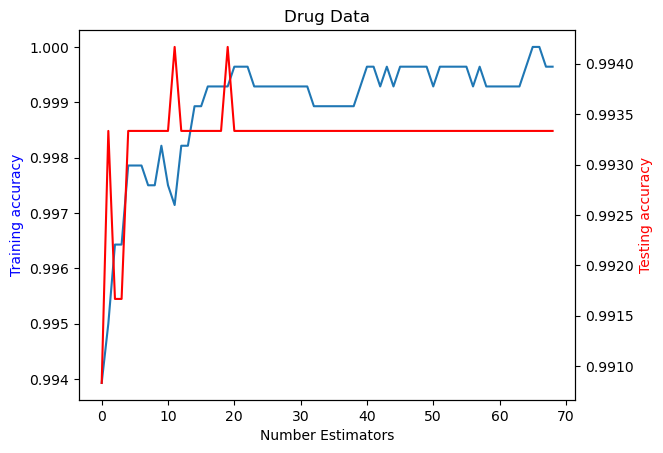

In [62]:
get_accuracy_bag(X, y, "Drug Data")